Loan Status Prediction
Life cycle of Machine learning Project

    Understanding the Problem Statement
    Data Collection
    Data Checks to perform
    Exploratory data analysis
    Data Pre-Processing


1) Problem statement

    This project classifies an individual whether he/she can get the loan amount based on his/her Income, Education, Working Experience, Loan taken previously, and many more factors.

2) Data Collection

    Dataset Source - https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction/data
    The data consists of 12 column and 382 rows.

2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [7]:
df = pd.read_csv('data/loan_data.csv')

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [9]:
df.shape

(381, 13)

2.2 Dataset information

    gender : sex of students -> (Male/female)
    race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
    parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
    lunch : having lunch before test (standard or free/reduced)
    test preparation course : complete or not complete before test
    math score
    reading score
    writing score


3. Data Checks to perform

    Check Missing values

    Check Duplicates

    Check data type

    Check the number of unique values of each column

    Check statistics of data set
    
    Check various categories present in the different categorical column


3.1 Check Missing values

In [10]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64


3.2 Check Duplicates

In [11]:
df.duplicated().sum()

0

There are no duplicates values in the data set


3.3 Check data types

In [12]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [13]:
df.nunique()

Loan_ID              381
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      322
CoapplicantIncome    182
LoanAmount           101
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Check statistics of data set

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


Insight

From above description of numerical data, all means are very close to each other - between 66 and 68.05.
All standard deviations are also close - between 14.6 and 15.19.
While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17.


Exploring Data

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [23]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Married' variable:  ",end=" ")
print(df['Married'].unique())

print("Categories in'Education' variable:",end=" " )
print(df['Education'].unique())

print("Categories in 'Self_Employed' variable:     ",end=" " )
print(df['Self_Employed'].unique())

print("Categories in 'Property_Area' variable:     ",end=" " )
print(df['Property_Area'].unique())

print("Categories in 'Loan_Status' variable:     ",end=" " )
print(df['Loan_Status'].unique())

Categories in 'Gender' variable:      ['Male' 'Female' nan]
Categories in 'Married' variable:   ['Yes' 'No']
Categories in'Education' variable: ['Graduate' 'Not Graduate']
Categories in 'Self_Employed' variable:      ['No' 'Yes' nan]
Categories in 'Property_Area' variable:      ['Rural' 'Urban' 'Semiurban']
Categories in 'Loan_Status' variable:      ['N' 'Y']


In [24]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

We have 8 categorical features : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [25]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


3.8 Adding columns for "Total Score" and "Average"

In [27]:
df['total score'] = df['ApplicantIncome'] + df['CoapplicantIncome'] + df['LoanAmount'] + df['Loan_Amount_Term'] + df['Credit_History']
df['average'] = df['total score']/5
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total score,average
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6580.0,1316.0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3427.0,685.4
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,5422.0,1084.4
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6502.0,1300.4
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,4305.0,861.0


4. Exploring Data ( Visualization )

4.1 Visualize average score distribution to make some conclusion.

    Histogram
    Kernel Distribution Function (KDE)

4.1.1 Histogram & KDE

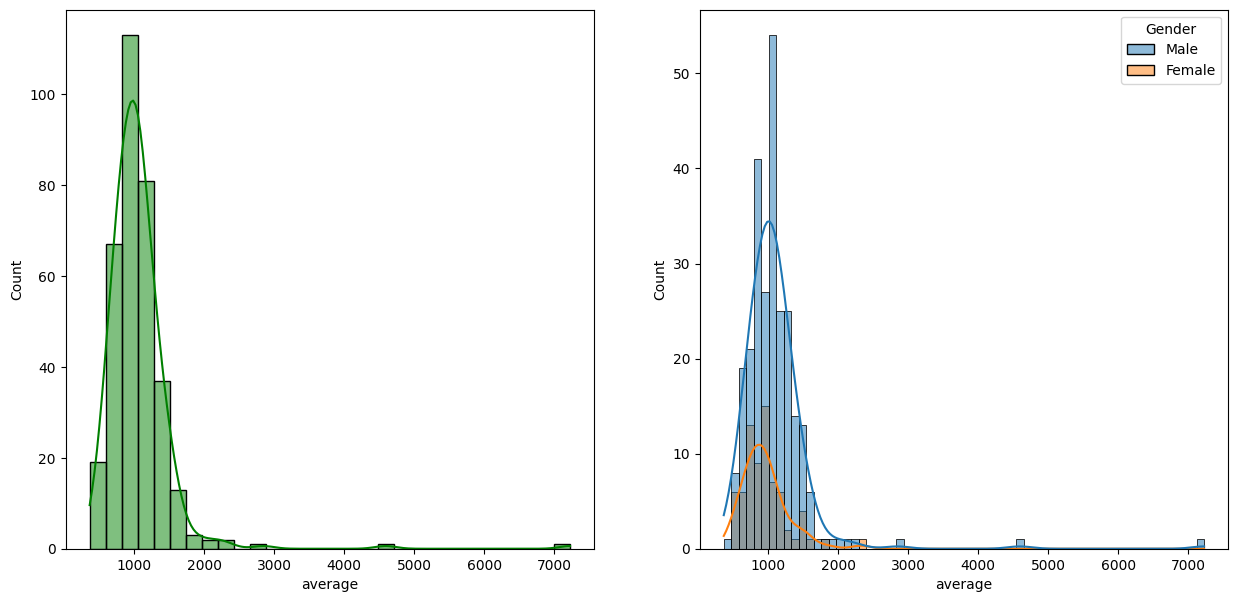

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='Gender')
plt.show()

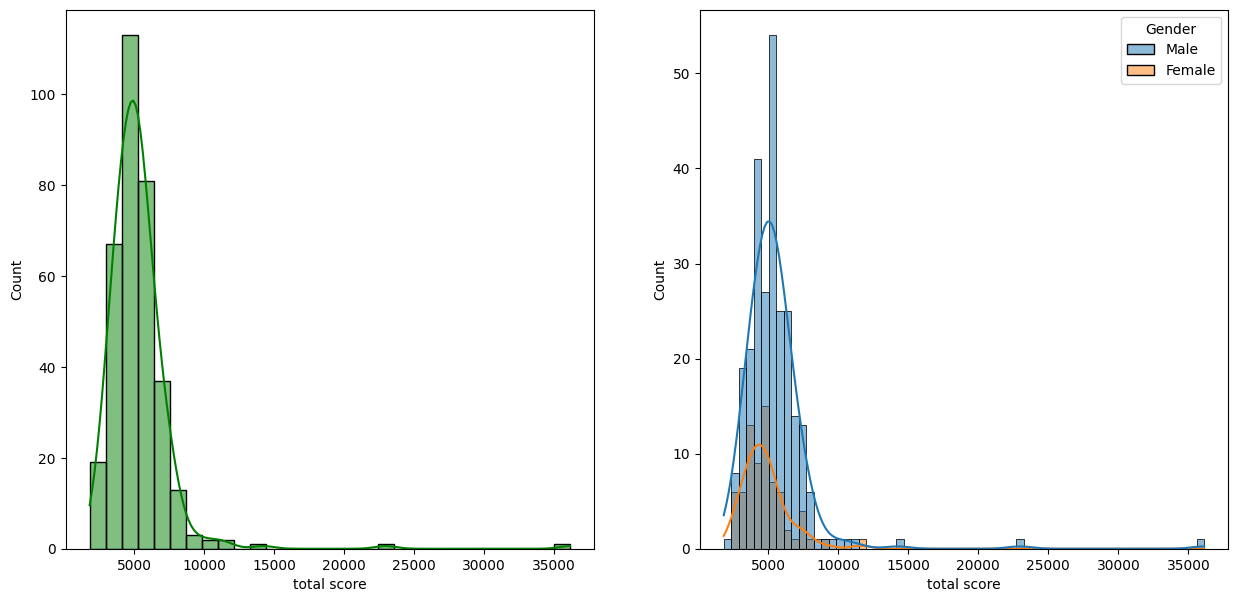

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='Gender')
plt.show()

Insights

    Females tend to collect more loans than males.



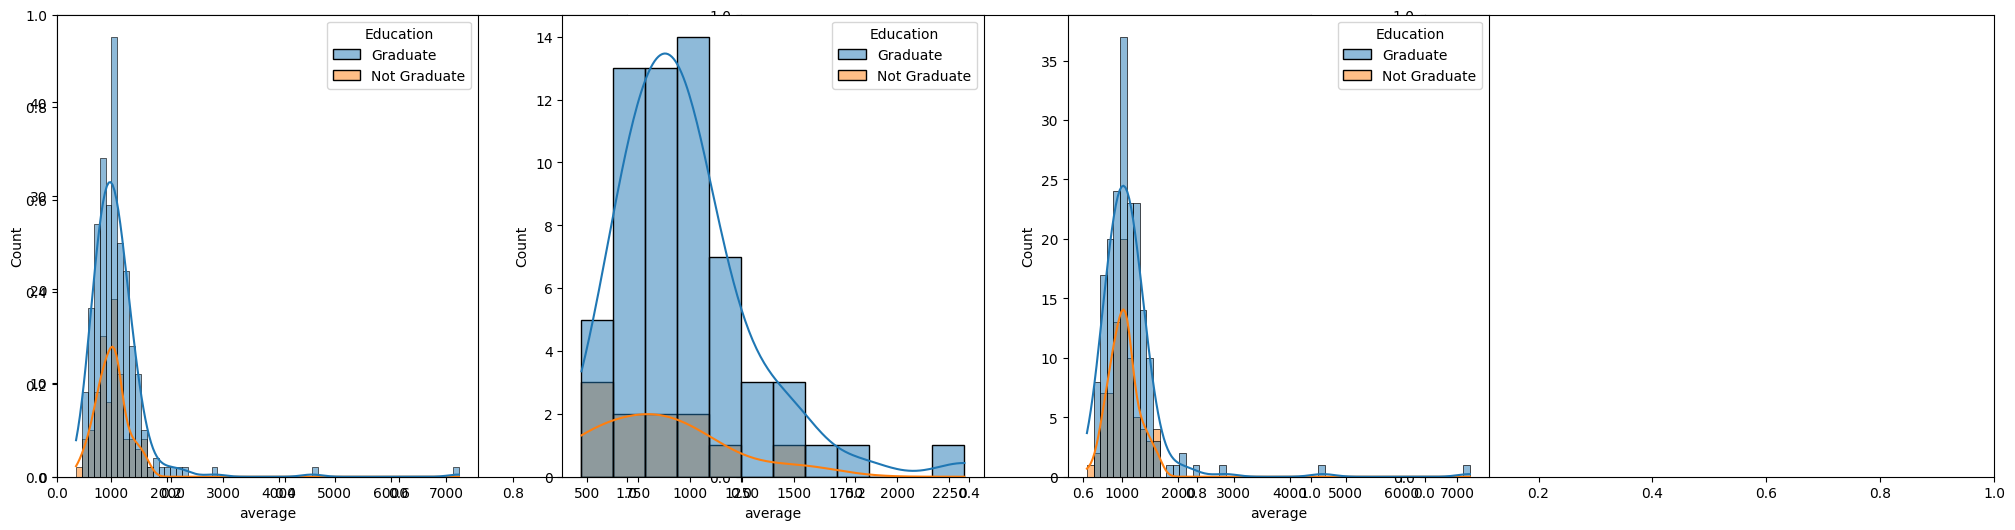

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='Education')
plt.subplot(142)
sns.histplot(data=df[df.Gender=='Female'],x='average',kde=True,hue='Education')
plt.subplot(143)
sns.histplot(data=df[df.Gender=='Male'],x='average',kde=True,hue='Education')
plt.show()

Insights

    Graduate level of education take more loans than people with non-graduate level.
    Standard lunch helps perform well in exams be it a male or a female.


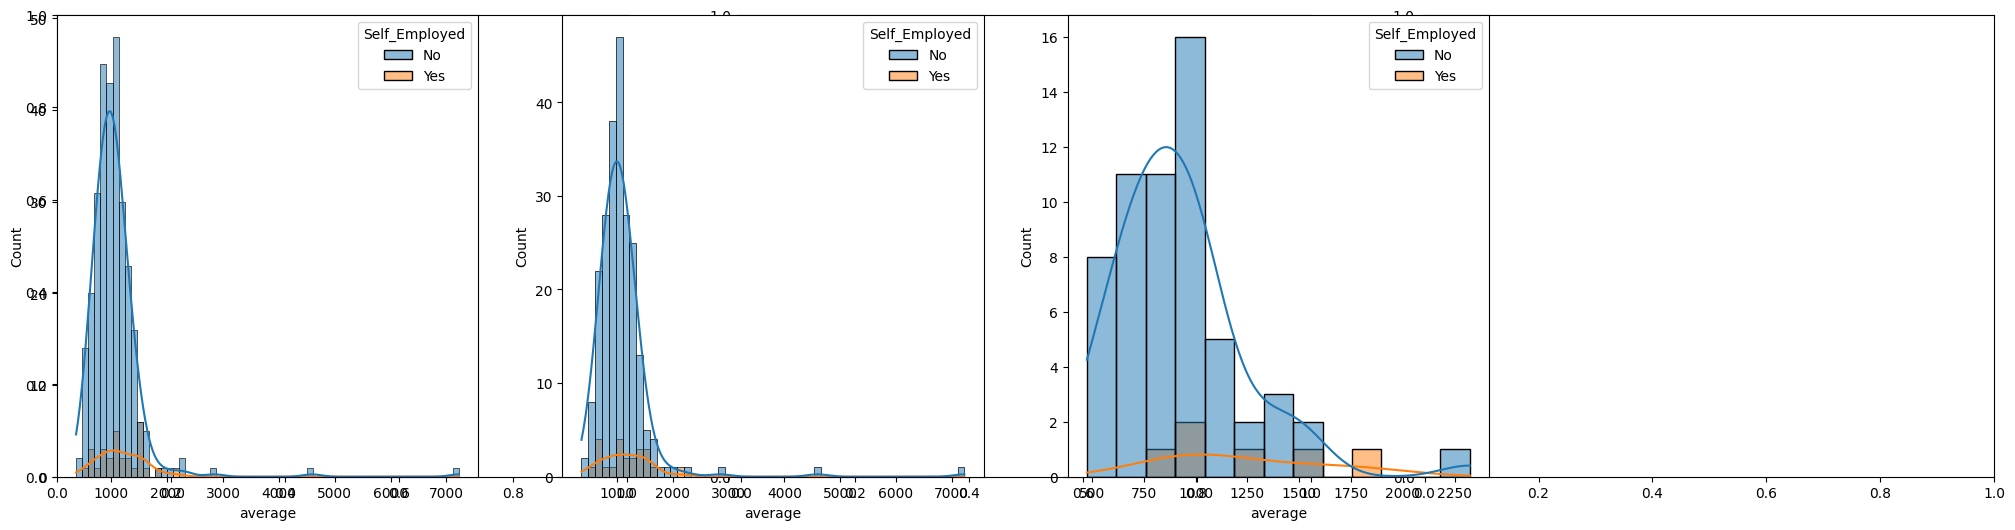

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='Self_Employed')
plt.subplot(142)
ax =sns.histplot(data=df[df.Gender=='Male'],x='average',kde=True,hue='Self_Employed')
plt.subplot(143)
ax =sns.histplot(data=df[df.Gender=='Female'],x='average',kde=True,hue='Self_Employed')
plt.show()

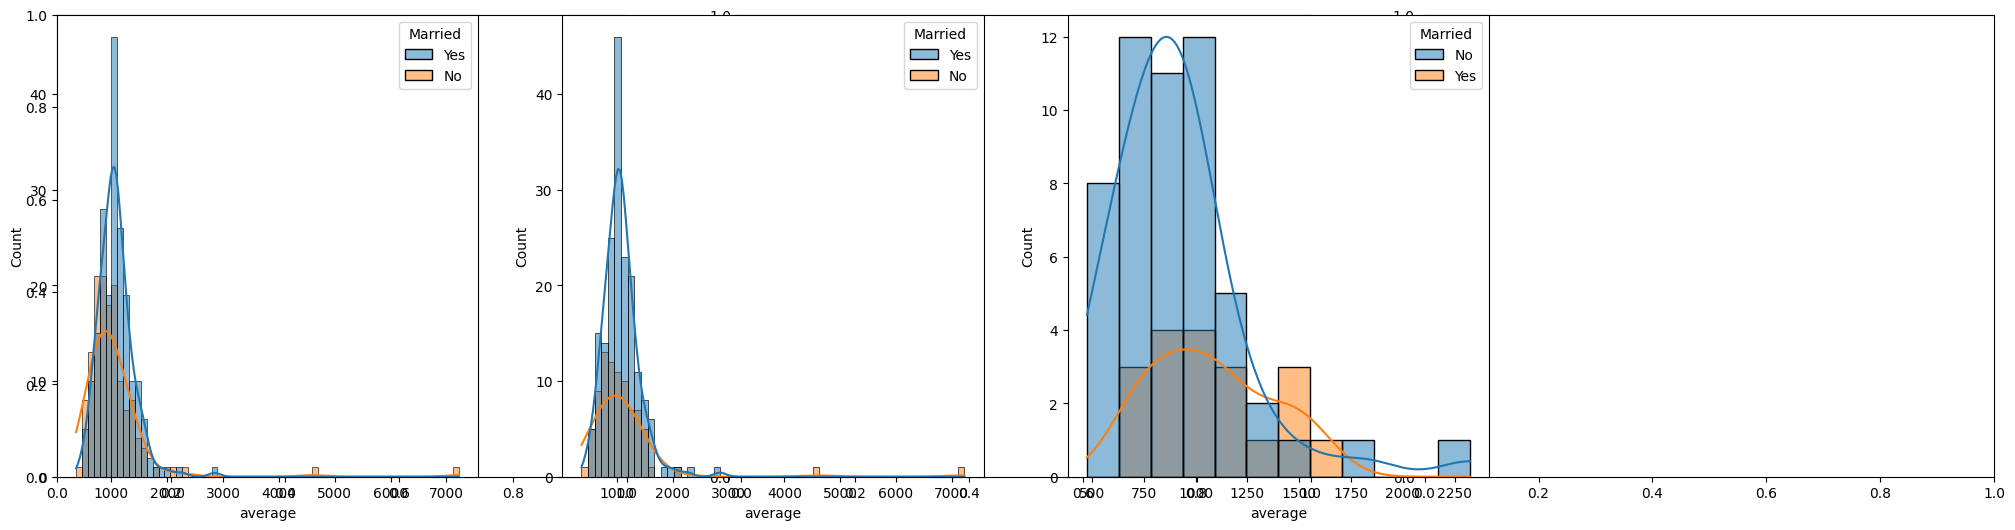

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='Married')
plt.subplot(142)
ax =sns.histplot(data=df[df.Gender=='Male'],x='average',kde=True,hue='Married')
plt.subplot(143)
ax =sns.histplot(data=df[df.Gender=='Female'],x='average',kde=True,hue='Married')
plt.show()

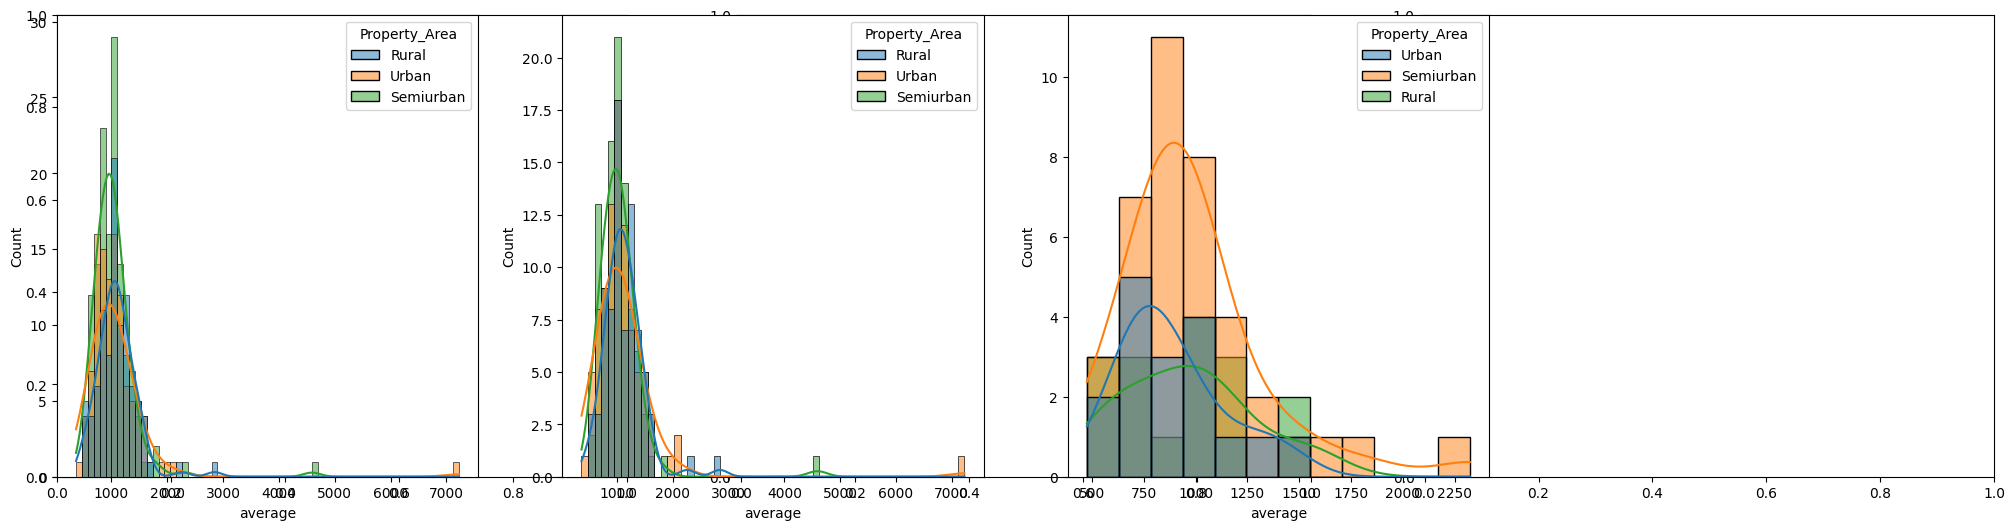

In [37]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='Property_Area')
plt.subplot(142)
ax =sns.histplot(data=df[df.Gender=='Male'],x='average',kde=True,hue='Property_Area')
plt.subplot(143)
ax =sns.histplot(data=df[df.Gender=='Female'],x='average',kde=True,hue='Property_Area')
plt.show()

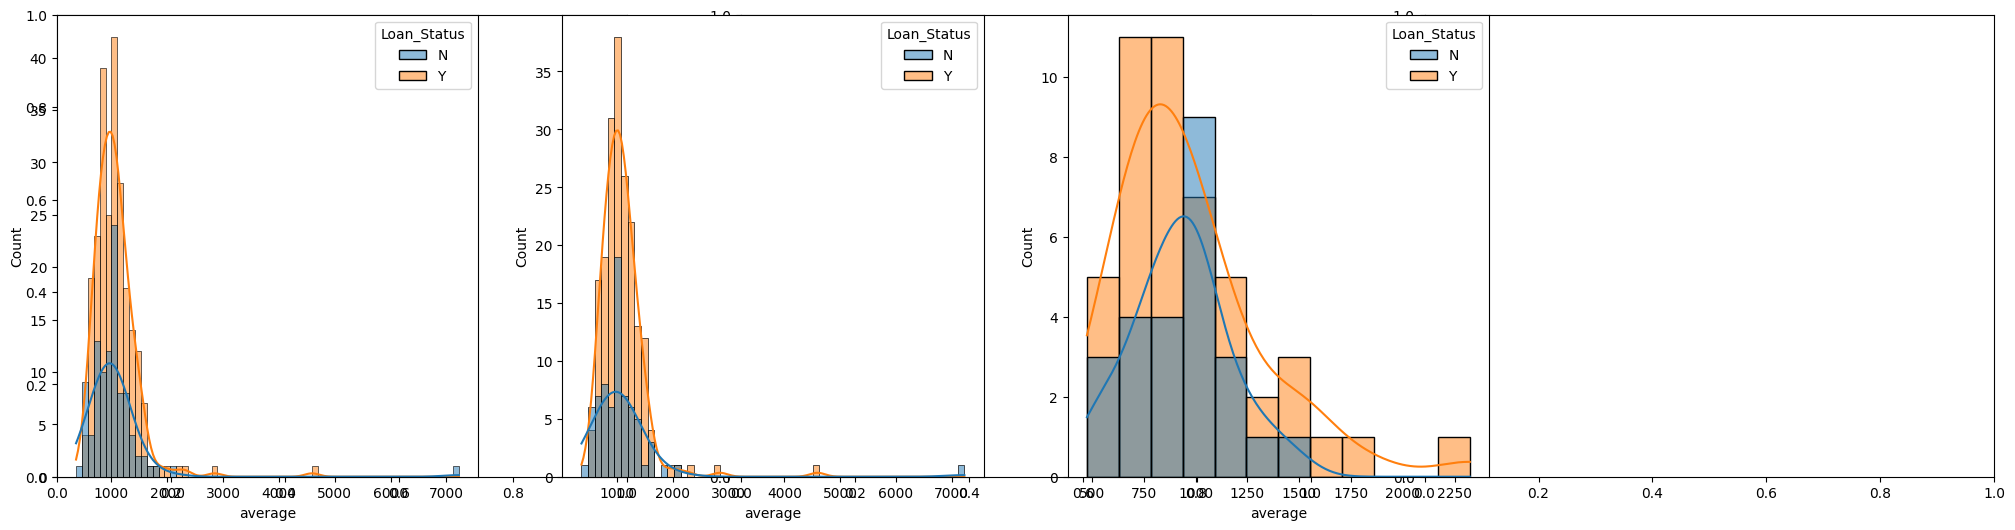

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='Loan_Status')
plt.subplot(142)
ax =sns.histplot(data=df[df.Gender=='Male'],x='average',kde=True,hue='Loan_Status')
plt.subplot(143)
ax =sns.histplot(data=df[df.Gender=='Female'],x='average',kde=True,hue='Loan_Status')
plt.show()


Observation

    Male gender apply for loan much more than female
    Married person has heigher frequency
    Graduated People apply for loan more
    Self Employed people are less to play for loan
    People living in semi urban area have heigher frequency
    People who has no dependent have more freqency followed by 2 Dependent and 3+ has least frequency



4.2 Maximumum score of students in all three subjects

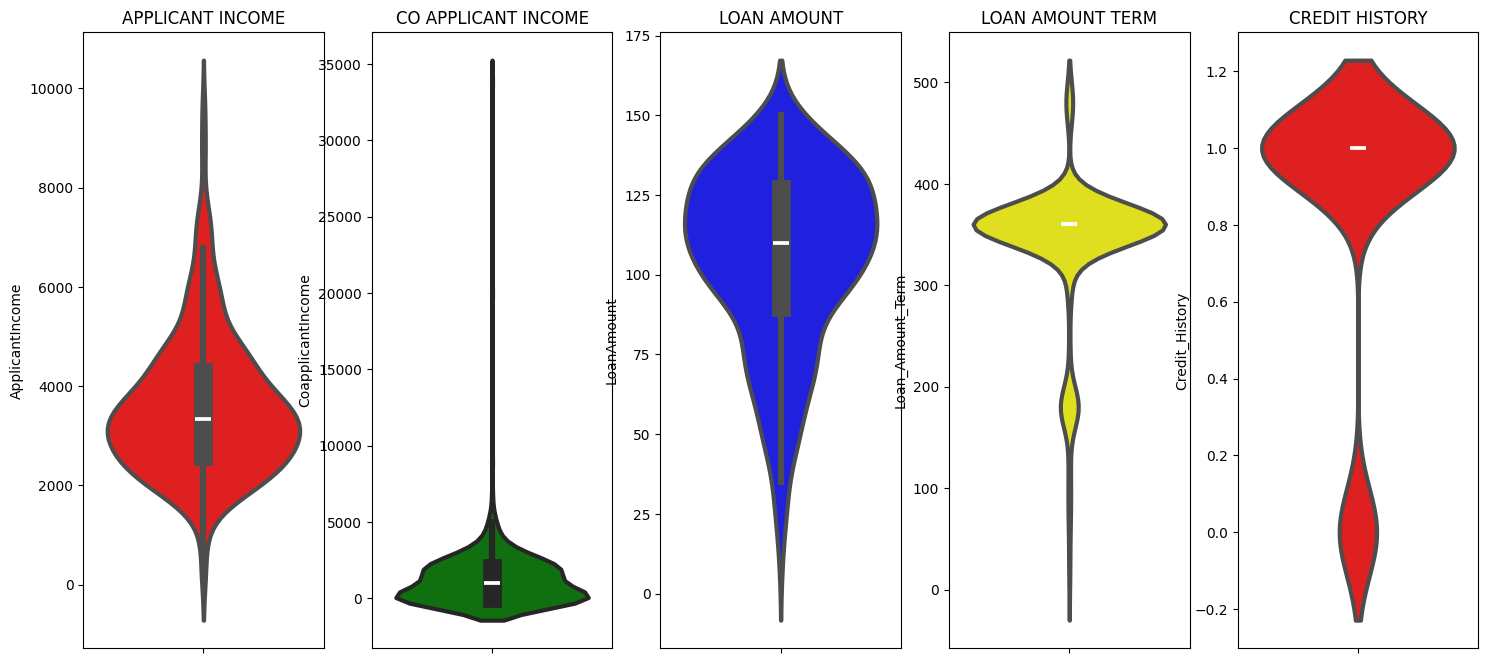

In [60]:
plt.figure(figsize=(18,8))
plt.subplot(1, 5, 1)
plt.title('APPLICANT INCOME')
sns.violinplot(y='ApplicantIncome',data=df,color='red',linewidth=3)
plt.subplot(1, 5, 2)
plt.title('CO APPLICANT INCOME')
sns.violinplot(y='CoapplicantIncome',data=df,color='green',linewidth=3)
plt.subplot(1, 5, 3)
plt.title('LOAN AMOUNT')
sns.violinplot(y='LoanAmount',data=df,color='blue',linewidth=3)
plt.subplot(1, 5, 4)
plt.title('LOAN AMOUNT TERM')
sns.violinplot(y='Loan_Amount_Term',data=df,color='yellow',linewidth=3)
plt.subplot(1, 5, 5)
plt.title('CREDIT HISTORY')
sns.violinplot(y='Credit_History',data=df,color='red',linewidth=3)
plt.show()


Insights

    From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

4.3 Multivariate analysis using pieplot

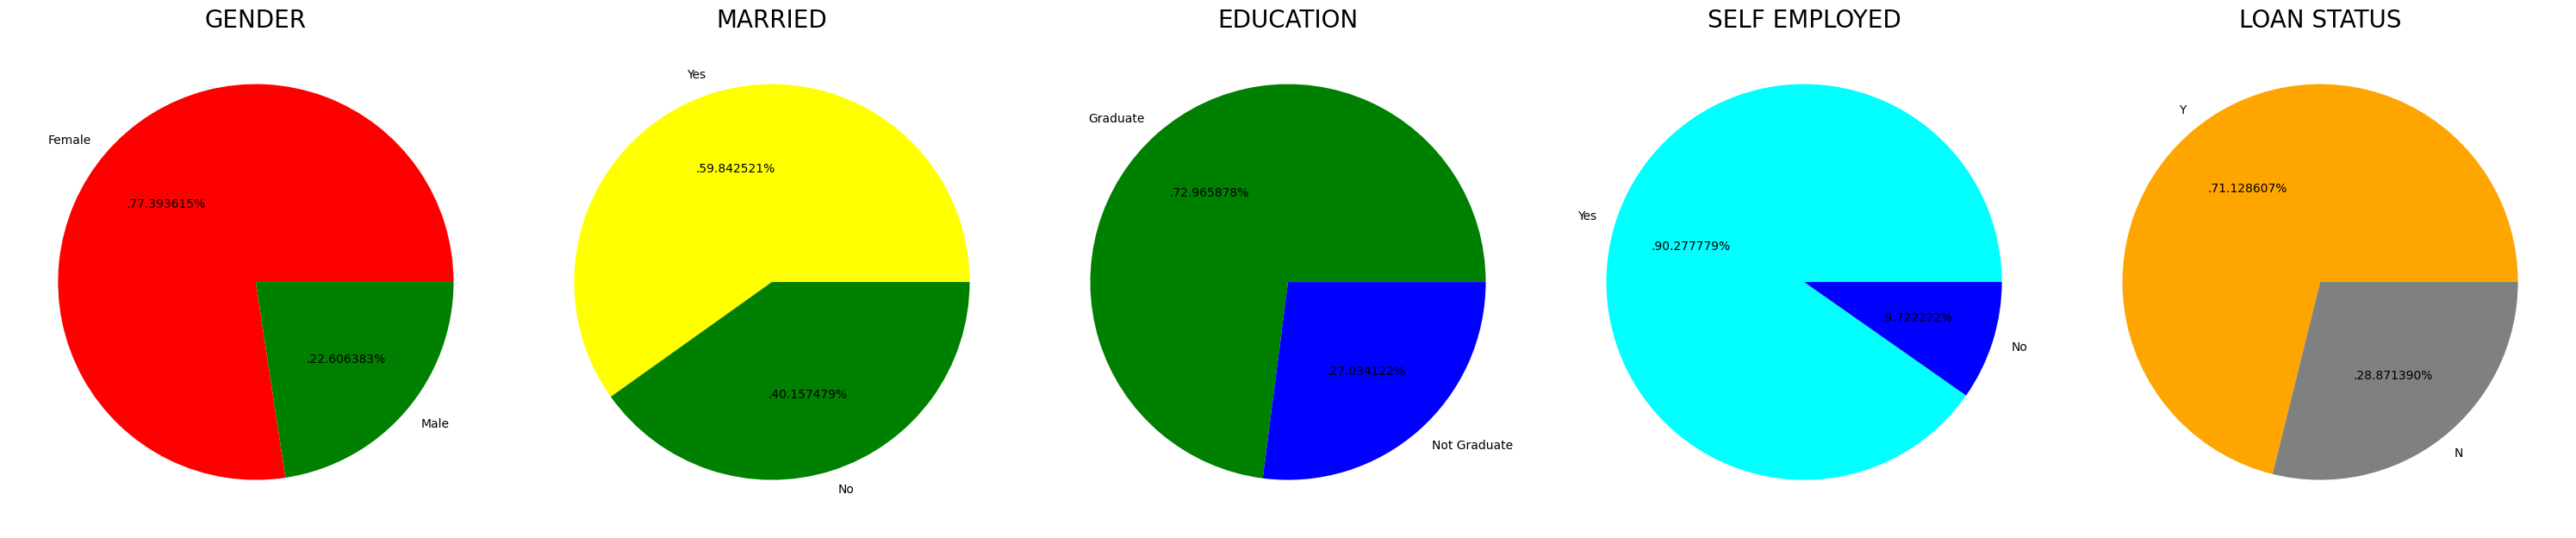

In [68]:
plt.rcParams['figure.figsize'] = (30, 18)

plt.subplot(1, 5, 1)
size = df['Gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('GENDER', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['Married'].value_counts()
labels = 'Yes', 'No'
color = ['yellow', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('MARRIED', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['Education'].value_counts()
labels = 'Graduate', 'Not Graduate'
color = ['green','blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('EDUCATION', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['Self_Employed'].value_counts()
labels = 'Yes', 'No'
color = ['cyan','blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('SELF EMPLOYED', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['Loan_Status'].value_counts()
labels = 'Y', 'N'
color = ['orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('LOAN STATUS', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights

    Number of Male and Female students is almost equal
    Number students are greatest in Group C
    Number of students who have standard lunch are greater
    Number of students who have not enrolled in any test preparation course is greater
    Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"



4.4 Feature Wise Visualization

4.4.1 GENDER COLUMN

    How is distribution of Gender ?
    Is gender has any impact on Loan Status Prediction ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

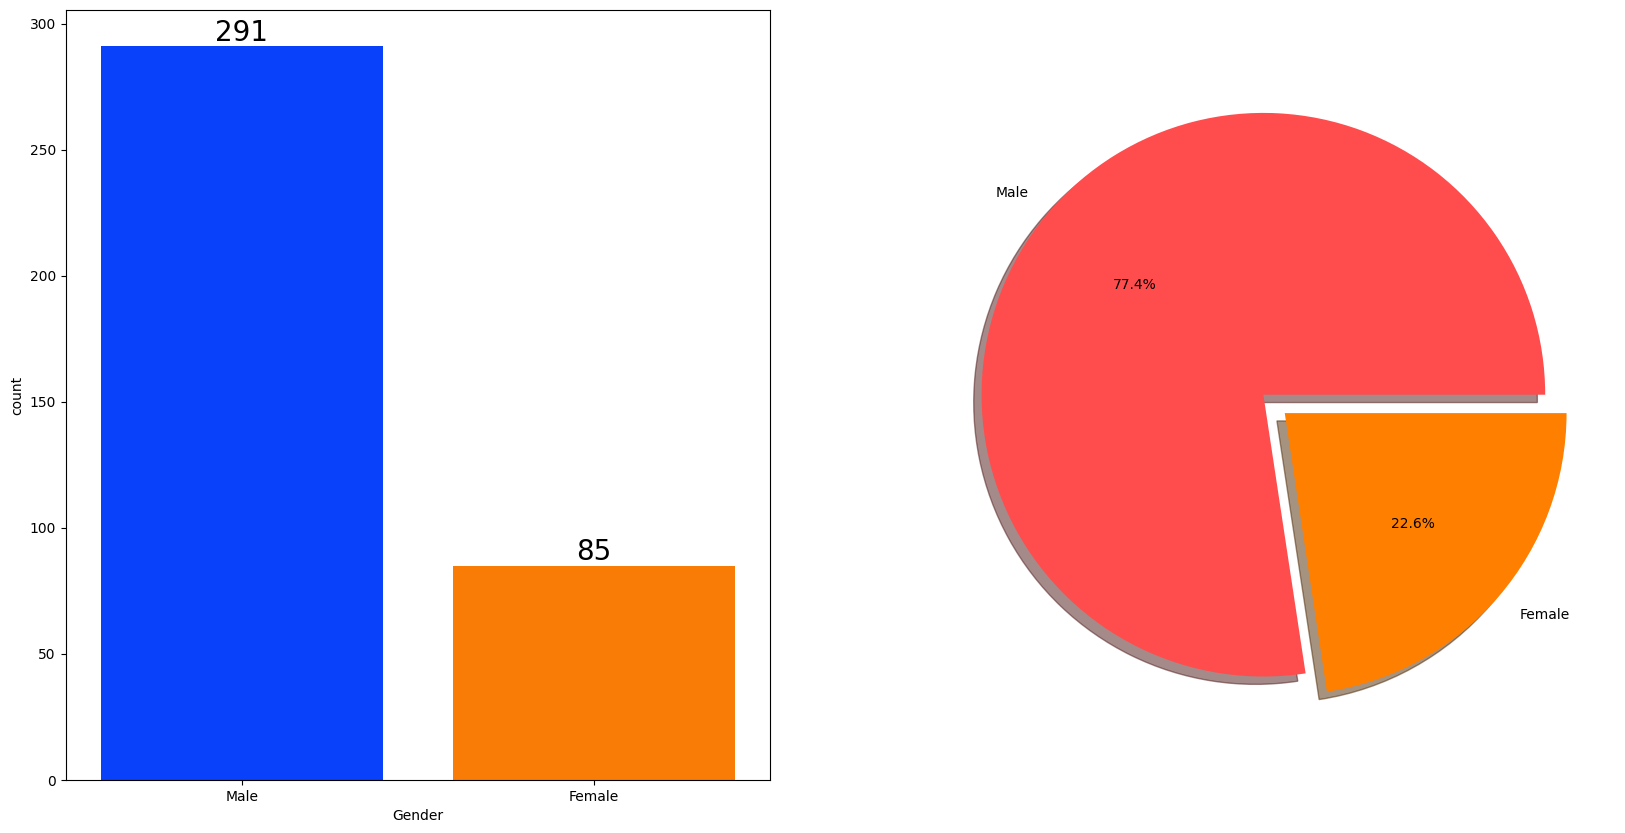

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights

    Gender has balanced data with female students are 85 (22.6%) and male students are 291 (77.4%)


BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [70]:
#calculate mean of math_score grouped by Gender
gender_group = df.groupby('Gender')['ApplicantIncome'].mean()
gender_group

Gender
Female    3487.717647
Male      3607.584192
Name: ApplicantIncome, dtype: float64

In [ ]:
plt.figure(figsize=(10, 8))

#X = ['Total average','Math average']
X = ['total score','average']

female_scores = [gender_group['average'][0], gender_group['ApplicantIncome'][0]]
male_scores = [gender_group['average'][1], gender_group['ApplicantIncome'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights

    On an average females have a better overall score than men.
    whereas males have scored higher in Maths.

4.4.2 MARRIED

    How is Group wise distribution ?
    Does marital status have any impact on loan status ?



UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

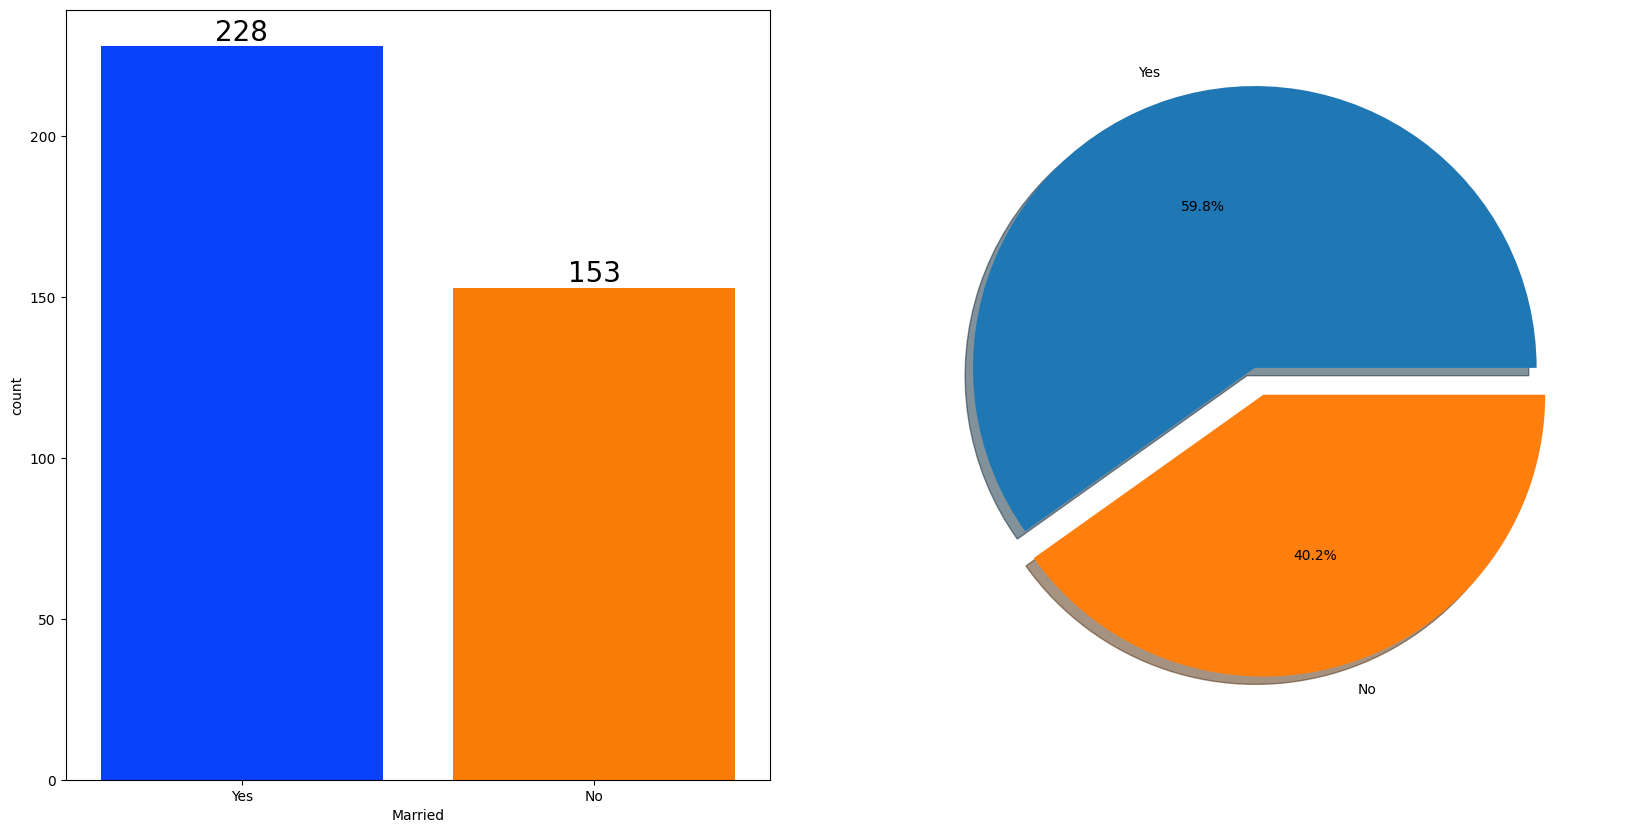

In [77]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Married'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Married'].value_counts(),labels=df['Married'].value_counts().index,explode=[0.1,0],autopct='%1.1f%%',shadow=True)
plt.show() 

BIVARIATE ANALYSIS ( Does marriage (marital status) have any impact on Loan Status ? )

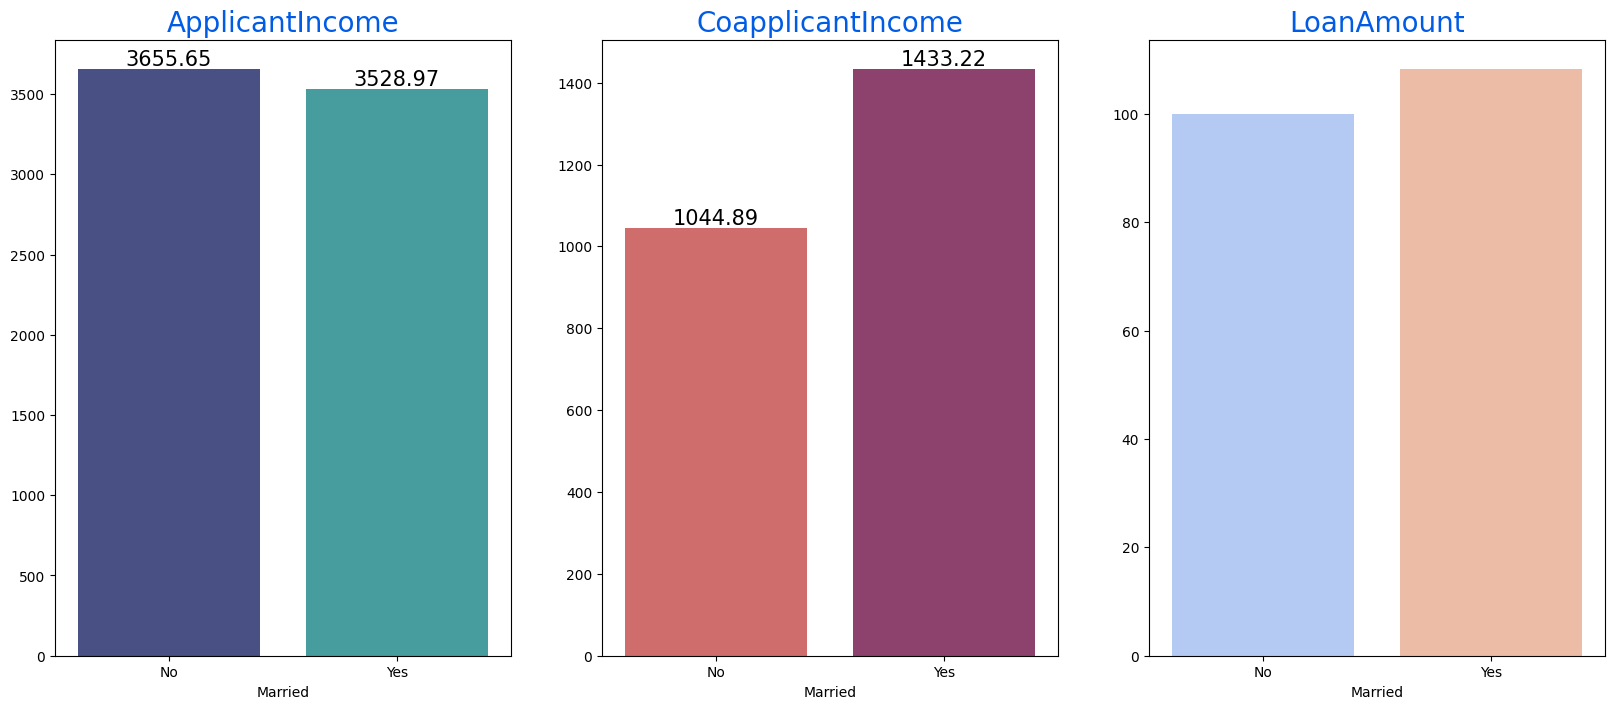

In [78]:
Group_data2=df.groupby('Married')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['ApplicantIncome'].mean().index,y=Group_data2['ApplicantIncome'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('ApplicantIncome',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['CoapplicantIncome'].mean().index,y=Group_data2['CoapplicantIncome'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('CoapplicantIncome',color='#005ce6',size=20)

sns.barplot(x=Group_data2['LoanAmount'].mean().index,y=Group_data2['LoanAmount'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('LoanAmount',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

4.4.3 EDUCATION

    How is Group wise distribution ?
    Does education has any impact on loan status ?


UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

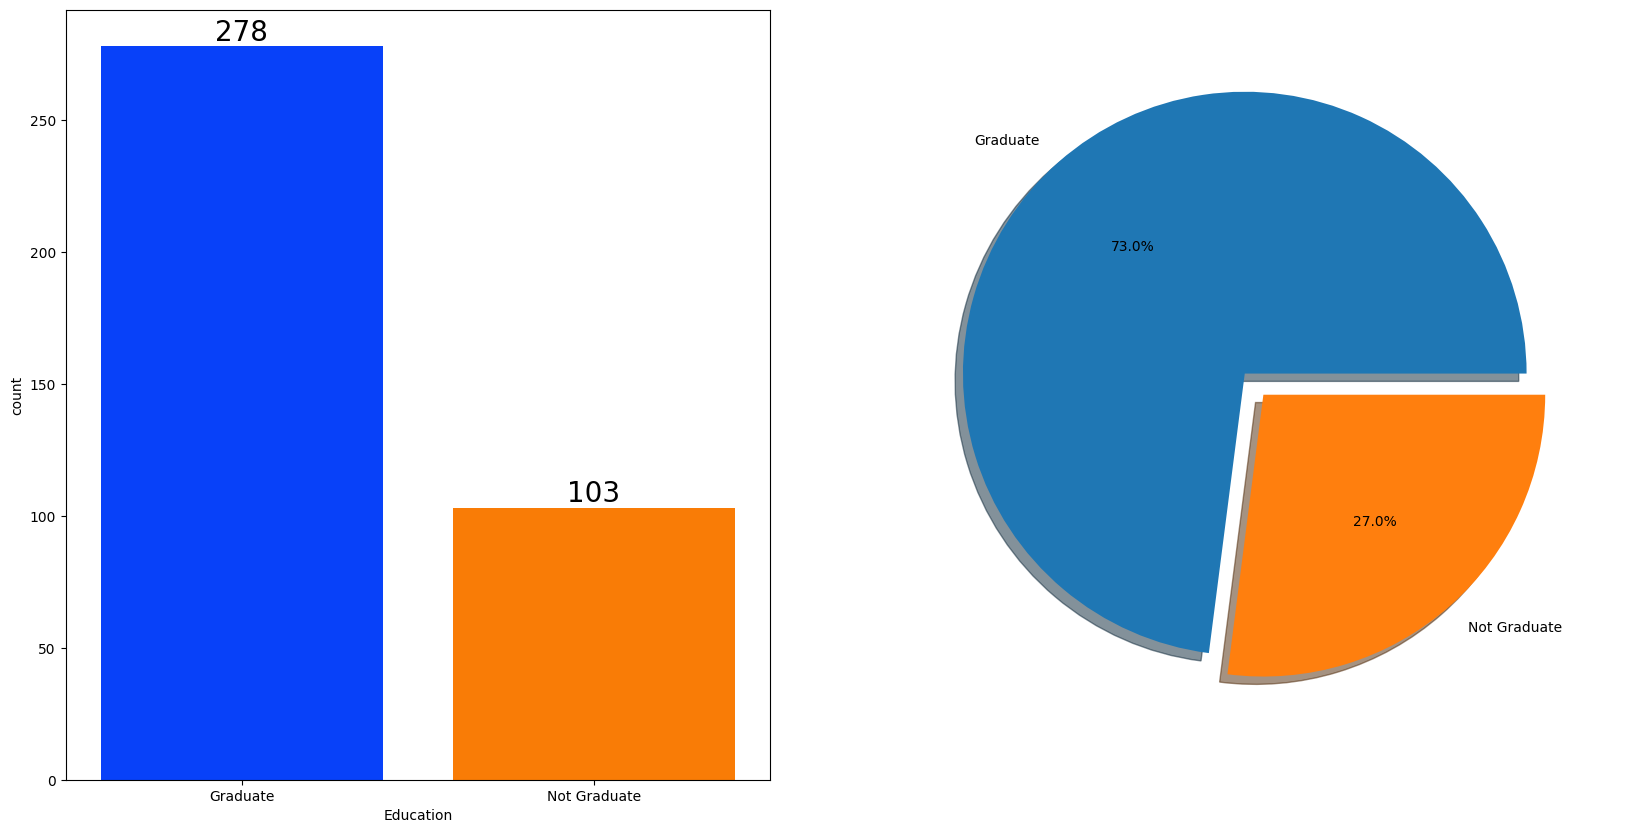

In [73]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Education'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Education'].value_counts(),labels=df['Education'].value_counts().index,explode=[0.1,0],autopct='%1.1f%%',shadow=True)
plt.show() 

BIVARIATE ANALYSIS ( Does Education have any impact on Loan Status ? )

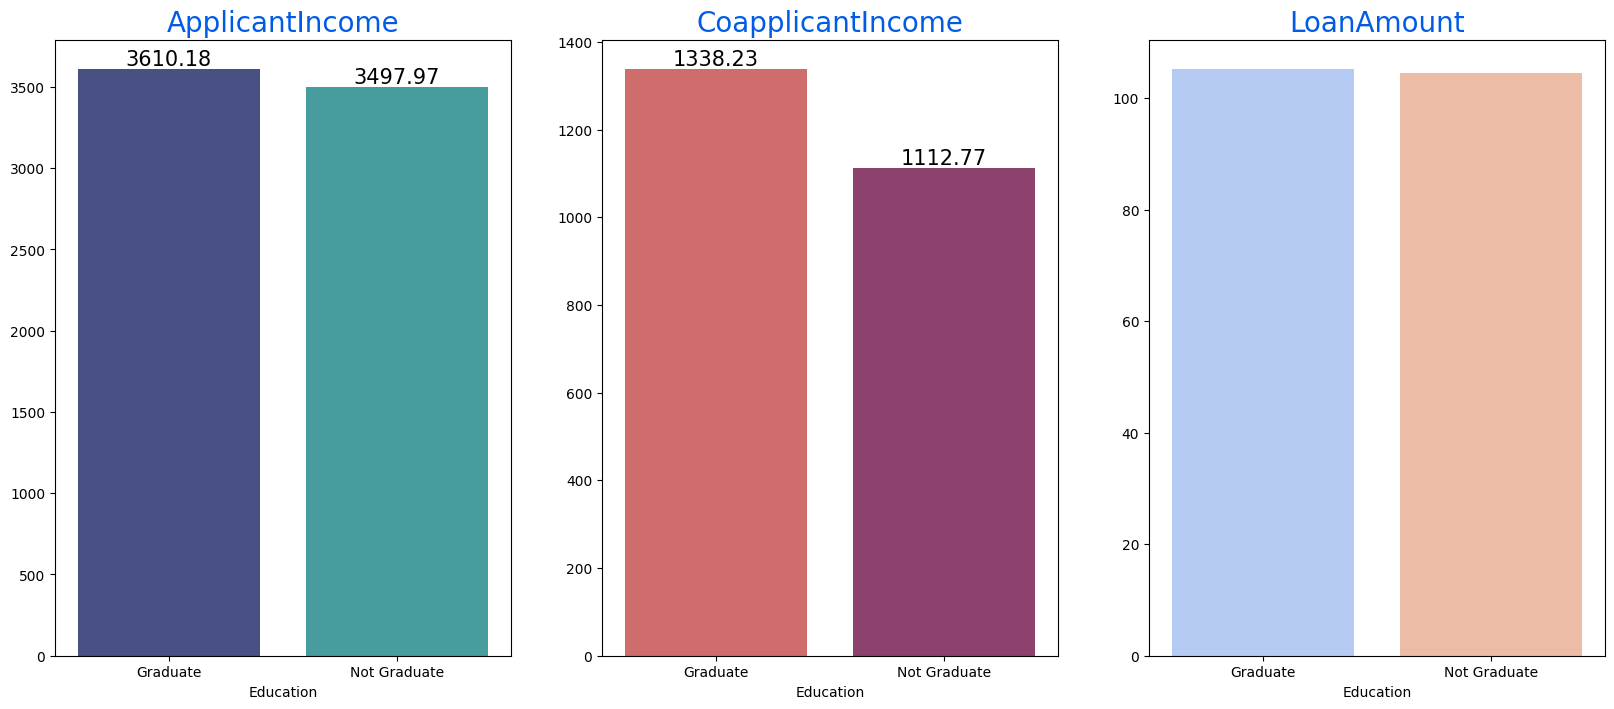

In [76]:
Group_data2=df.groupby('Education')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['ApplicantIncome'].mean().index,y=Group_data2['ApplicantIncome'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('ApplicantIncome',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['CoapplicantIncome'].mean().index,y=Group_data2['CoapplicantIncome'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('CoapplicantIncome',color='#005ce6',size=20)

sns.barplot(x=Group_data2['LoanAmount'].mean().index,y=Group_data2['LoanAmount'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('LoanAmount',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

Insights

    Group E students have scored the highest marks.
    Group A students have scored the lowest marks.
    Students from a lower Socioeconomic status have a lower avg in all course subjects

4.4.4 SELF-EMPLOYED

    How is Group wise distribution ?
    Does self-employed have any impact on loan status ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

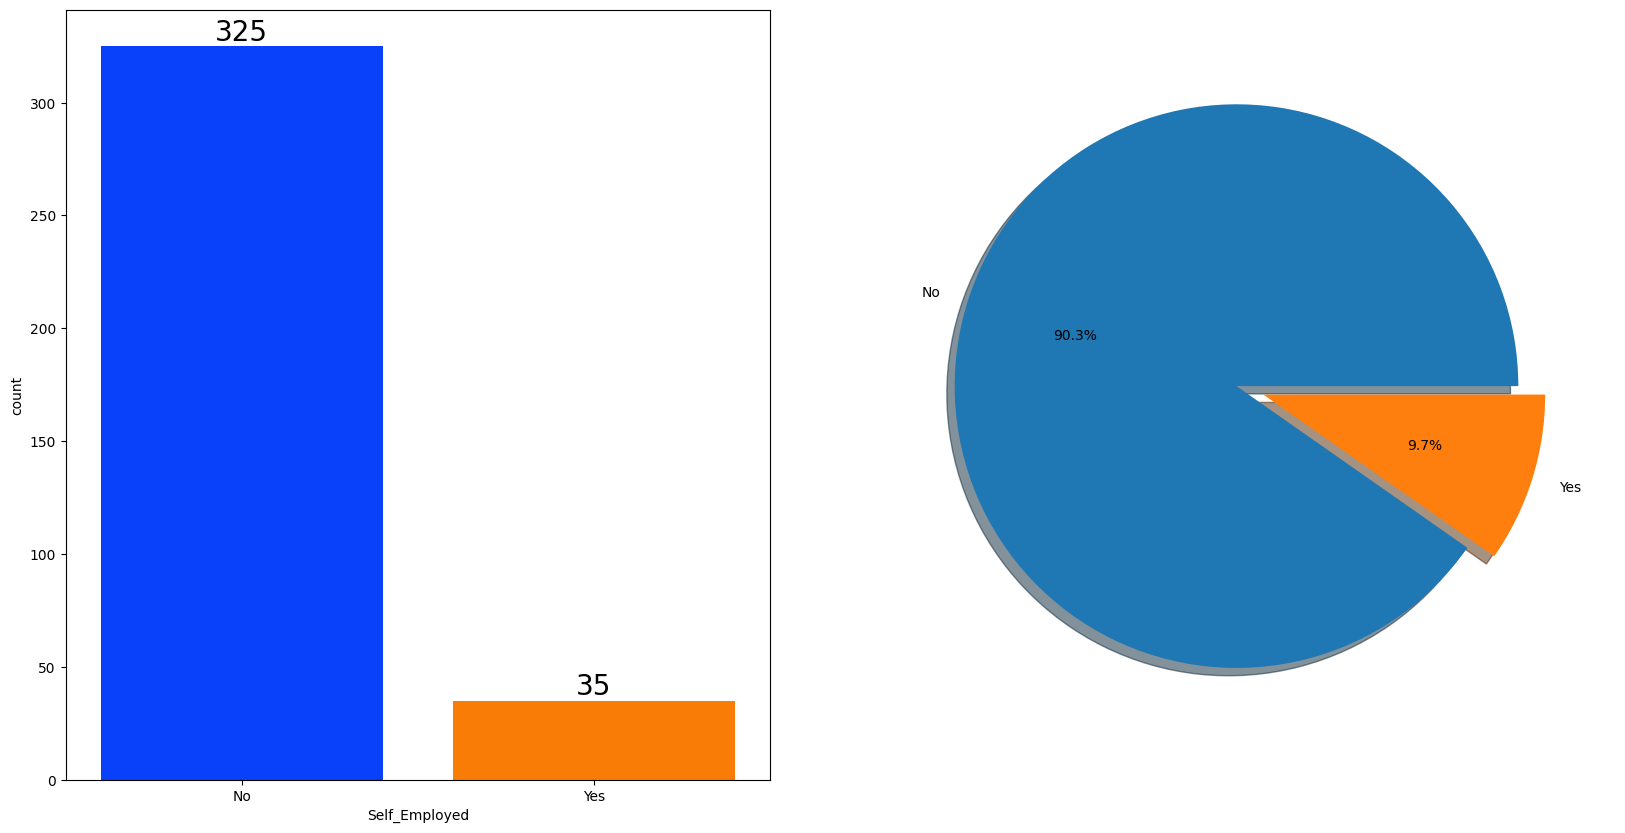

In [79]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Self_Employed'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Self_Employed'].value_counts(),labels=df['Self_Employed'].value_counts().index,explode=[0.1,0],autopct='%1.1f%%',shadow=True)
plt.show() 

BIVARIATE ANALYSIS ( Does Self-employed have any impact on Loan Status ? )

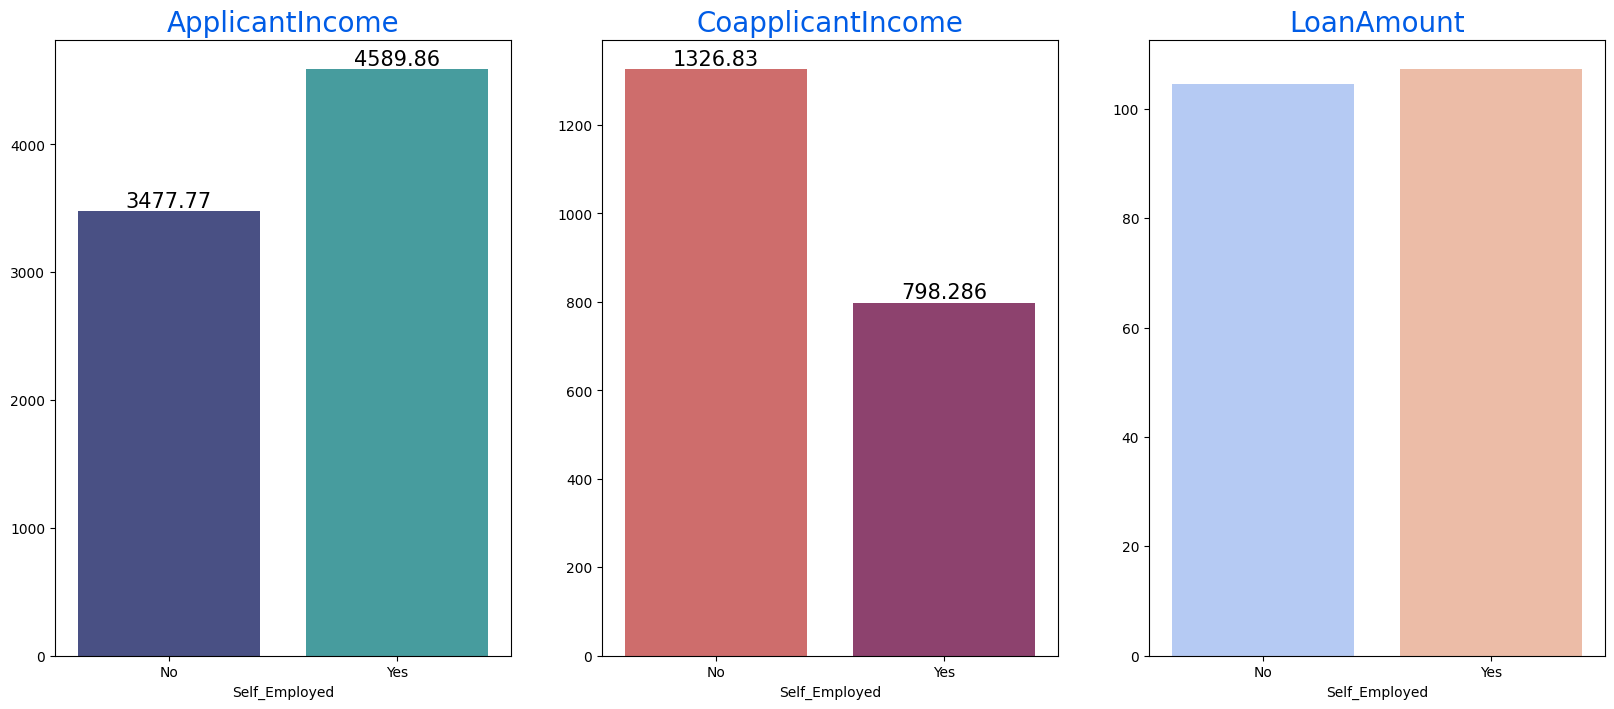

In [80]:
Group_data2=df.groupby('Self_Employed')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['ApplicantIncome'].mean().index,y=Group_data2['ApplicantIncome'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('ApplicantIncome',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['CoapplicantIncome'].mean().index,y=Group_data2['CoapplicantIncome'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('CoapplicantIncome',color='#005ce6',size=20)

sns.barplot(x=Group_data2['LoanAmount'].mean().index,y=Group_data2['LoanAmount'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('LoanAmount',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

Insights

    Group E students have scored the highest marks.
    Group A students have scored the lowest marks.
    Students from a lower Socioeconomic status have a lower avg in all course subjects

4.4.5 PROPERTY AREA

    How is Group wise distribution ?
    Does Property_Area have any impact on loan status ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

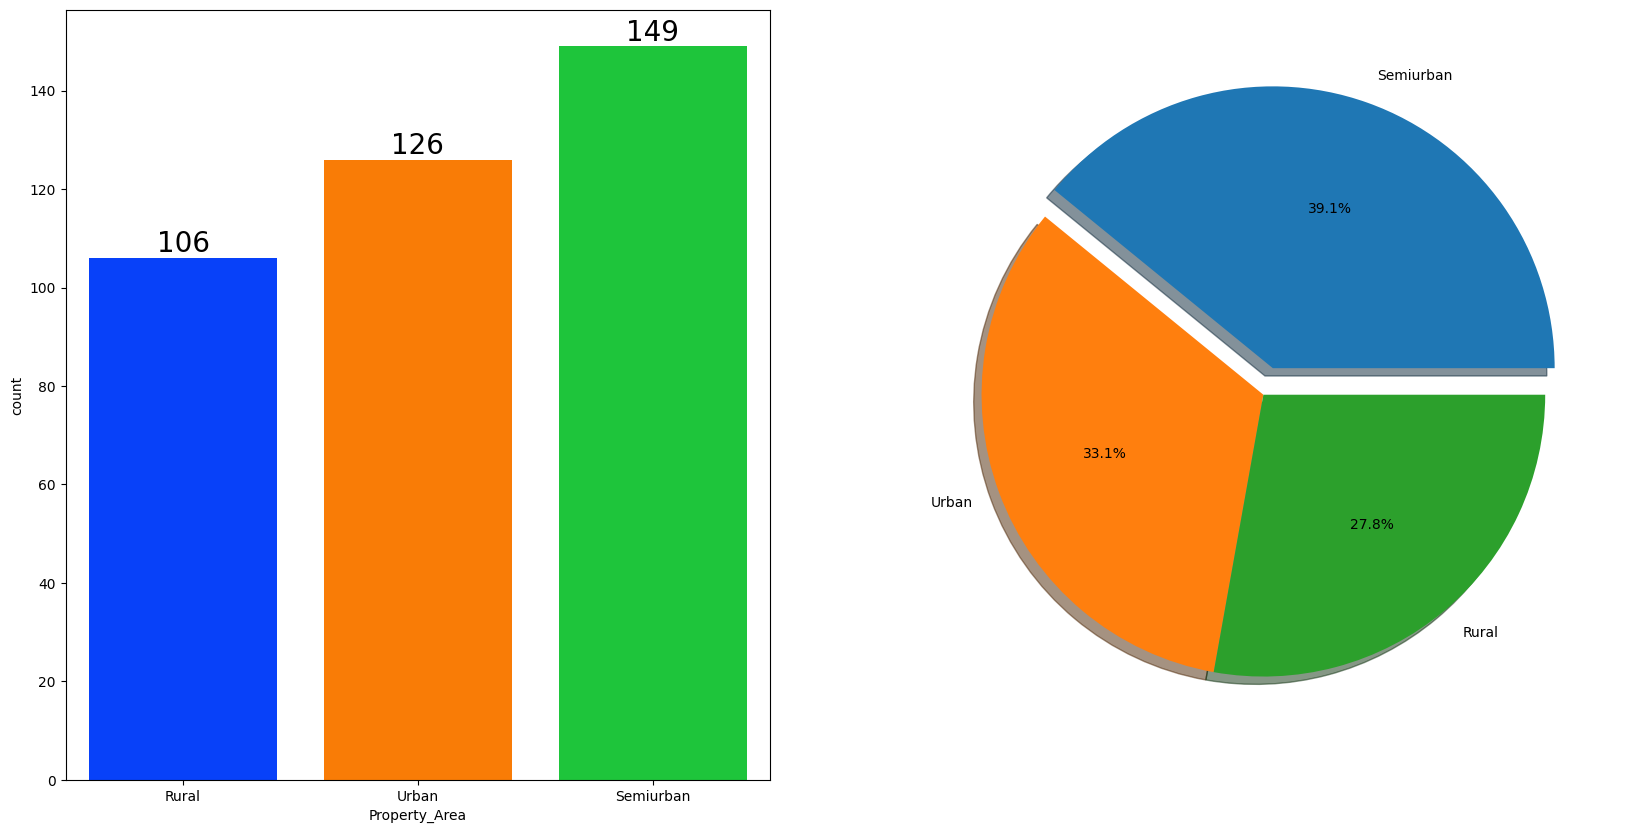

In [82]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Property_Area'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Property_Area'].value_counts(),labels=df['Property_Area'].value_counts().index,explode=[0.1,0, 0],autopct='%1.1f%%',shadow=True)
plt.show() 

Insights

    People who stay who have properties in semiurban areas tend to take more loans than the others

BIVARIATE ANALYSIS ( Does Property_Area have any impact on Loan Status ? )

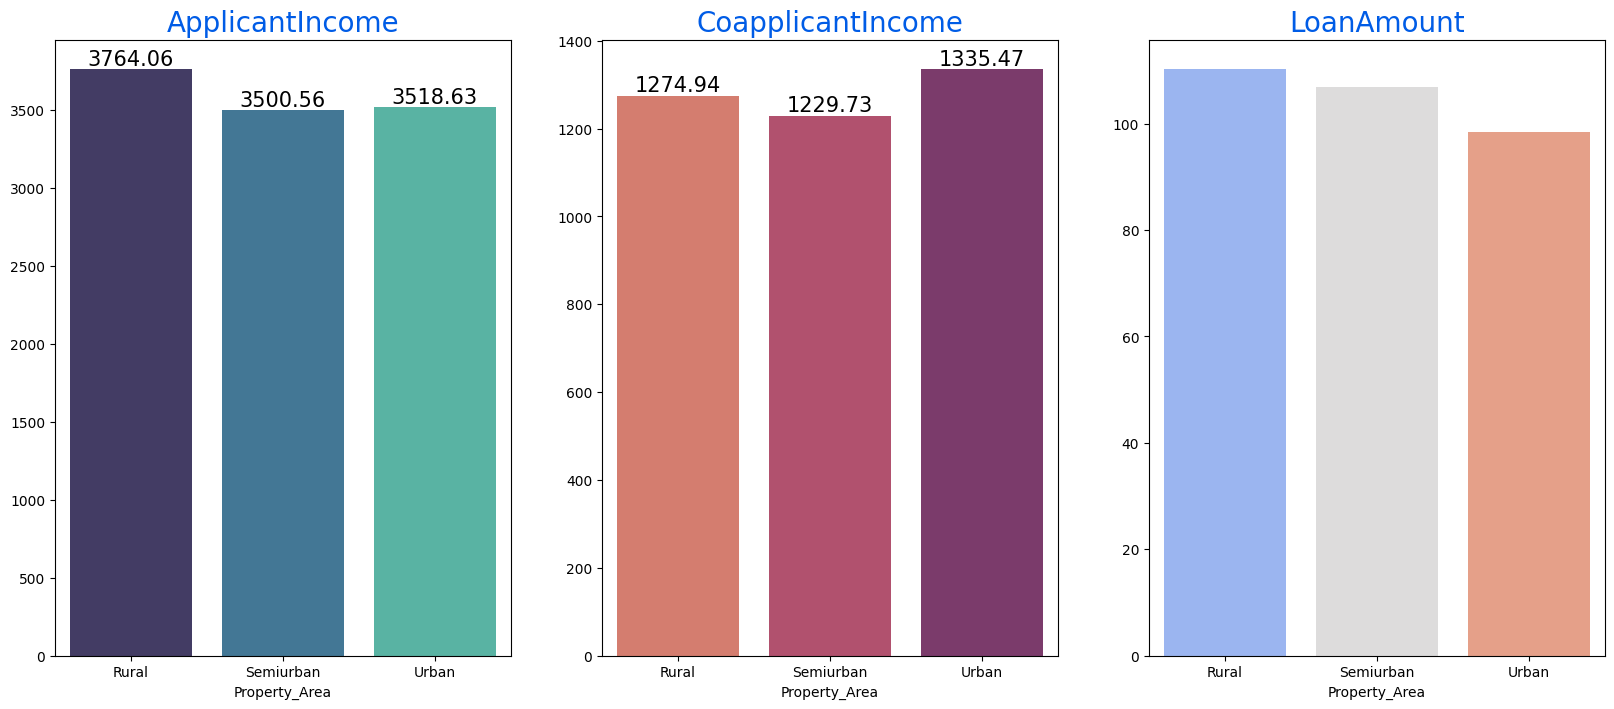

In [83]:
Group_data2=df.groupby('Property_Area')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['ApplicantIncome'].mean().index,y=Group_data2['ApplicantIncome'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('ApplicantIncome',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['CoapplicantIncome'].mean().index,y=Group_data2['CoapplicantIncome'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('CoapplicantIncome',color='#005ce6',size=20)

sns.barplot(x=Group_data2['LoanAmount'].mean().index,y=Group_data2['LoanAmount'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('LoanAmount',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

Insights

    Group E students have scored the highest marks.
    Group A students have scored the lowest marks.
    Students from a lower Socioeconomic status have a lower avg in all course subjects

4.4.6 LOAN STATUS

    How is Group wise distribution ?
    Does Loan_Status have any impact on loan status ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

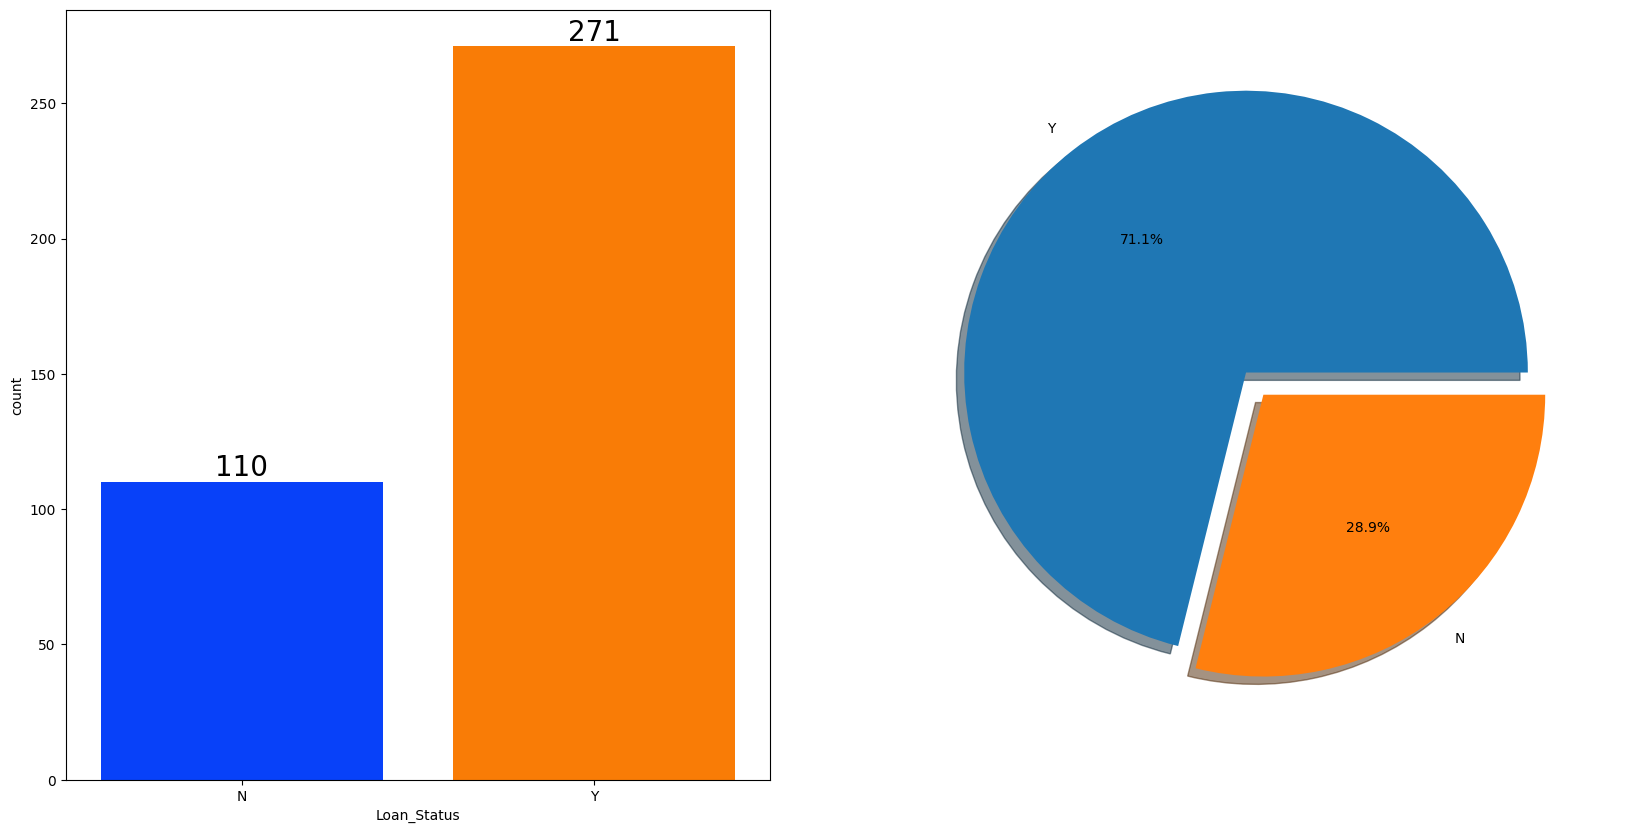

In [85]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Loan_Status'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Loan_Status'].value_counts(),labels=df['Loan_Status'].value_counts().index,explode=[0.1,0],autopct='%1.1f%%',shadow=True)
plt.show() 

Insights

    People who stay who have properties in semiurban areas tend to take more loans than the others

BIVARIATE ANALYSIS ( Does Loan_Status have any impact on Loan Status ? )

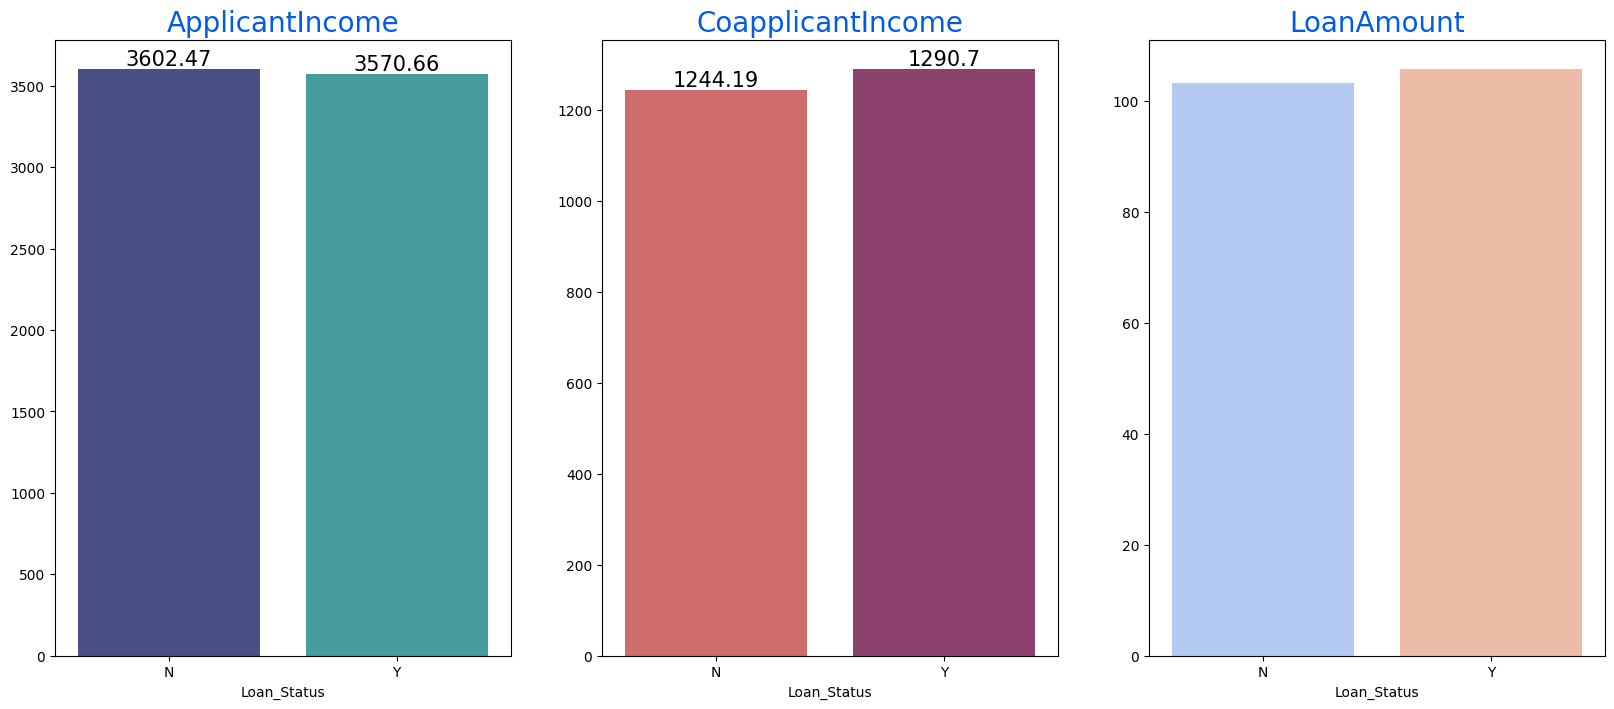

In [86]:
Group_data2=df.groupby('Loan_Status')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['ApplicantIncome'].mean().index,y=Group_data2['ApplicantIncome'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('ApplicantIncome',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['CoapplicantIncome'].mean().index,y=Group_data2['CoapplicantIncome'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('CoapplicantIncome',color='#005ce6',size=20)

sns.barplot(x=Group_data2['LoanAmount'].mean().index,y=Group_data2['LoanAmount'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('LoanAmount',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)